<a href="https://colab.research.google.com/github/mehraj1234/winter-22/blob/main/Group_Mini_Project_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df.shape

(37638, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [ ]:
# creating the var ny_df
# which will contain rows only if they match
# the state column having 'New York'
ny_df = df[df['state']=='New York']

In [ ]:
# preview of the data 
# showing us the date
# the state of new york being the focus
# the fips
# cases
# deaths
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
# the shape is 683 rows and 5 columns
# columns are date, state, fips, cases, deaths
ny_df.shape

(684, 5)

In [ ]:
# the tail of the data is shown
# showing us the date
# the state of new york being the focus
# the fips
# cases
# deaths
ny_df.tail()

,date,state,fips,cases,deaths
37392,2022-01-09,New York,36,4136861,60083
37448,2022-01-10,New York,36,4194745,60162
37504,2022-01-11,New York,36,4244155,60428
37560,2022-01-12,New York,36,4299066,60638
37616,2022-01-13,New York,36,4361115,60876


In [ ]:
#first death in NY
# first_ny_death dataframe shows us where deaths are not equal to 0
# so every row here will contain of at least 1 death
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
#total number of cases
ny_df['cases'].max()

4361115

In [ ]:
ny_df['cases'].cumsum()

246              1
261              2
276              4
293             15
313             37
           ...    
37392    936502157
37448    940696902
37504    944941057
37560    949240123
37616    953601238
Name: cases, Length: 684, dtype: int64

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [ ]:
# count total cases
ny_df['new_cases'].sum()

4361115

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

In [ ]:
ny3_df = ny_df
ny3_df['date'] = pd.to_datetime(ny3_df['date'], format='%Y-%m-%d')
filtered_ny3_df = ny3_df.loc[(ny3_df['date'] >= '2021-04-01')
                     & (ny3_df['date'] < '2021-08-02')]
filtered_ny3_df.reset_index(inplace=True)
postvaxdates = filtered_ny3_df
print(postvaxdates)
postvaxdates['Deaths in Thousands'] = postvaxdates['deaths'].divide(1000)
postvaxdates['Cases in Millions'] = postvaxdates['cases'].divide(1000000)
print(postvaxdates)

     index       date     state  fips    cases  deaths  new_cases
0    21717 2021-04-01  New York    36  1880768   49872       9173
1    21772 2021-04-02  New York    36  1888823   49946       8055
2    21827 2021-04-03  New York    36  1896534   50042       7711
3    21882 2021-04-04  New York    36  1904141   50124       7607
4    21937 2021-04-05  New York    36  1910858   50195       6717
..     ...        ...       ...   ...      ...     ...        ...
118  28207 2021-07-28  New York    36  2140050   53248       1800
119  28262 2021-07-29  New York    36  2142694   53250       2644
120  28317 2021-07-30  New York    36  2145309   53257       2615
121  28372 2021-07-31  New York    36  2148445   53266       3136
122  28427 2021-08-01  New York    36  2151035   53274       2590

[123 rows x 7 columns]
     index       date  ... Deaths in Thousands  Cases in Millions
0    21717 2021-04-01  ...              49.872           1.880768
1    21772 2021-04-02  ...              49.946      

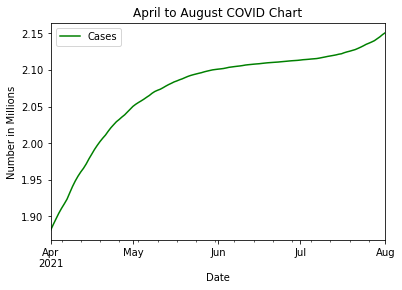

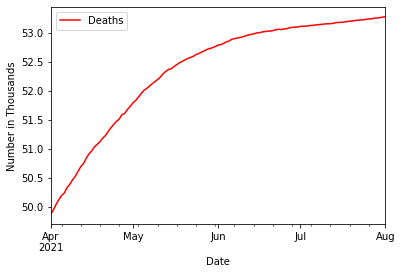

In [ ]:
postvaxdates.plot('date','Cases in Millions',color = 'g', label = 'Cases')
plt.title('April to August COVID Chart')
plt.xlabel('Date')
plt.ylabel('Number in Millions')
postvaxdates.plot(x = 'date', color = 'r', y= 'Deaths in Thousands', label = 'Deaths')
plt.xlabel('Date')
plt.ylabel('Number in Thousands')
plt.legend
plt.show()

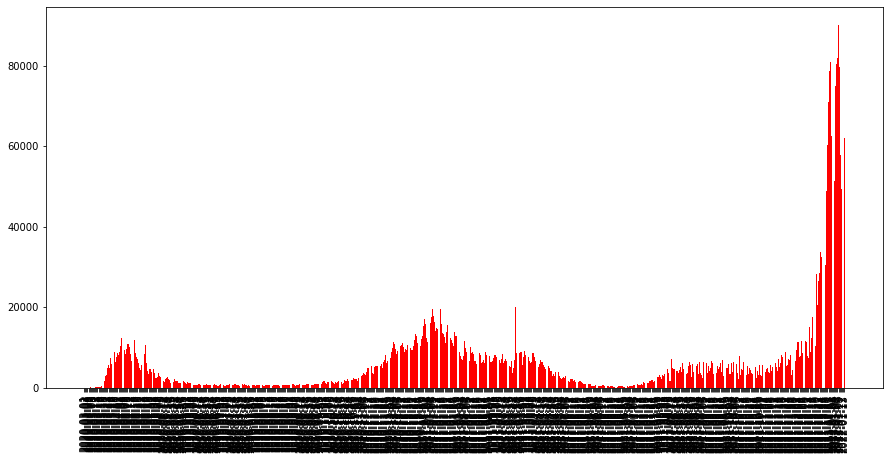

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

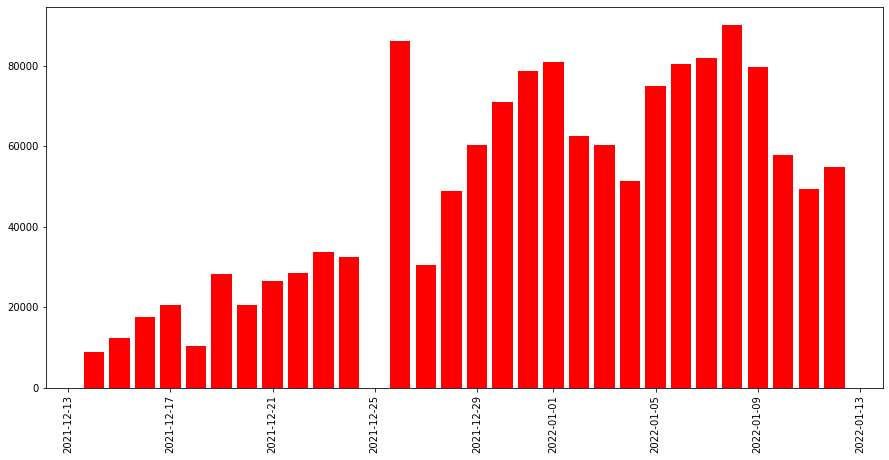

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

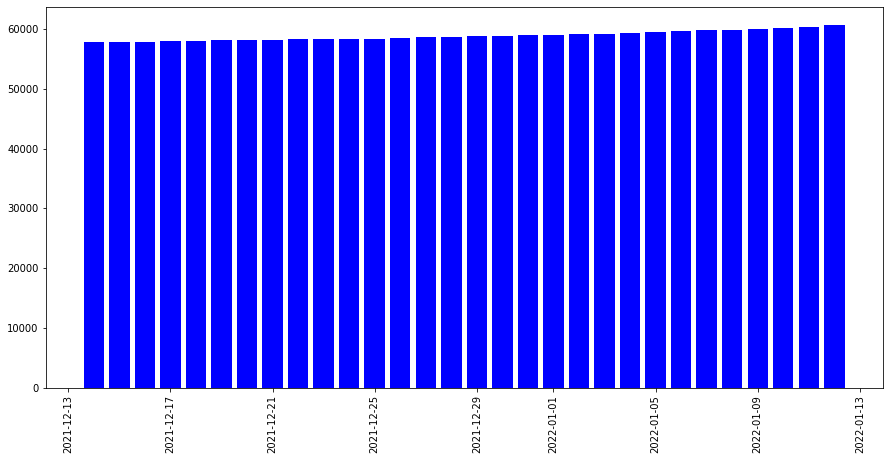

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

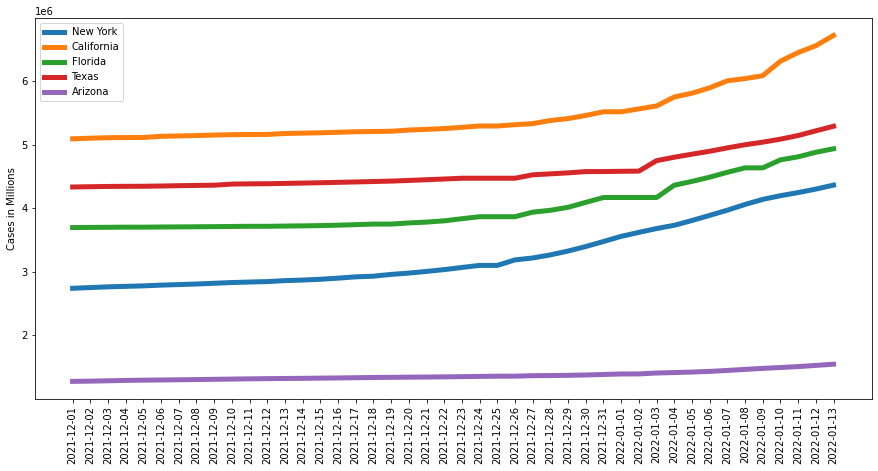

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2021-12-01')]
  plt.plot(df_st['date'],df_st['cases'],linewidth=5)
  plt.xticks(rotation=90)
plt.legend(states)
plt.ylabel('Cases in Millions')
plt.show()


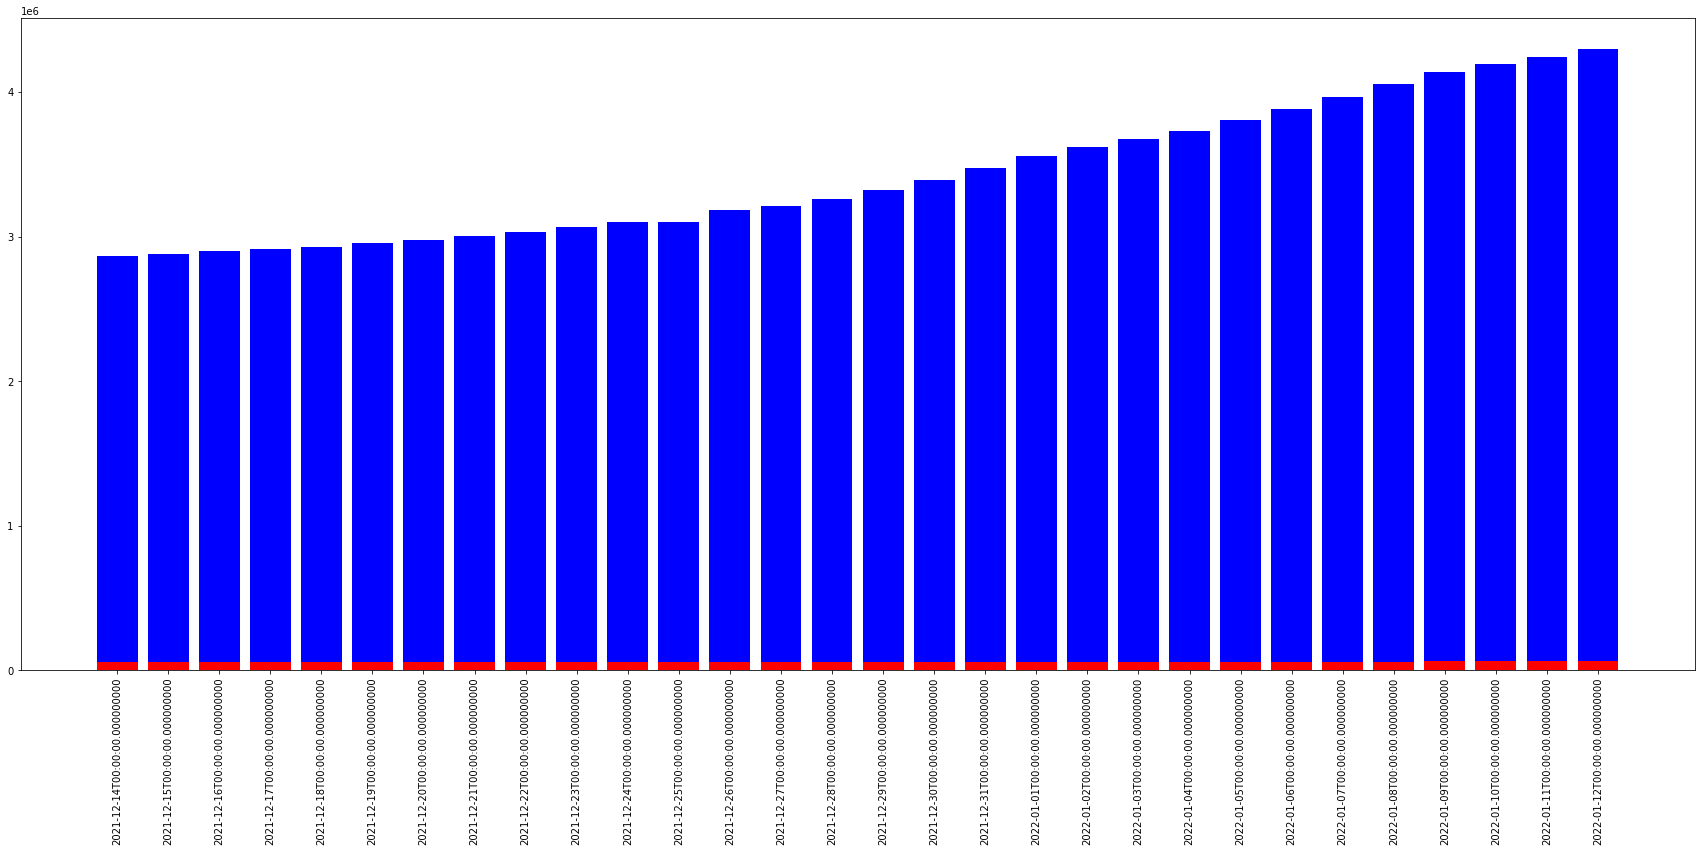

In [ ]:
fig, ax = plt.subplots(figsize=(30,12))

#Blue graph reflects the number of cases in NY of Covid
#Y-axis scaled in millions
ax = plt.bar(x = ny_dates_30,
             height = ny_cases_30, 
             data=ny_cases_30, 
             tick_label = ny_dates_30,
             color = 'blue')

#Red Graph reflects the number of deaths in NY from Covid
ax = plt.bar(x = ny_dates_30,
             height = ny_deaths_30,
             data = ny_deaths_30,
             tick_label = ny_dates_30,
             color = 'red')

plt.xticks(rotation=90)
plt.show()

Below are the conclusions:



1.   ***Conclusion 1***
      *--From April 2021, once vaccines became more available to the general public, the number of cases began to decline, however, once the general population became more complacent due to the vaccination, the cases shot up once again as the delta variant was introduced. Additionally, we see that after vaccinations, the rate of deaths decreased heavily, even accounting for the second surge.*
2.   ***Conclusion 2***
     *--Comparing COVID-19 between states experiencing the worst outbreaks, it appears that the rankings were unchanged with the omicron variant. However, California and New York raised the highest.*

